In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
# load the excel sheet into a dataframe
df = pd.read_excel('apartments.xlsx', index_col='id')

In [3]:
df = df[df.status == 'Published']

# Format the representation of floats
pd.options.display.float_format = '{:,.1f}'.format

# Set styling of graphs to use seaborn
sns.set()

In [4]:
# presents all columns in the df
df.columns

'''
Numeric:
• rooms
• floor
• max_floor
• size
• no_balconies
• size_balconies_total
• construction_year
• yard_size
• storage_size
• no_elevators
• no_parking
• price
• squared_meter_price
• property_tax
• maintenance_fee

Could be converted to numeric:
• type
• condition
• photos_existence
• city
• address - longtitiude + latitude
• agent
'''

'\nNumeric:\n• rooms\n• floor\n• max_floor\n• size\n• no_balconies\n• size_balconies_total\n• construction_year\n• yard_size\n• storage_size\n• no_elevators\n• no_parking\n• price\n• squared_meter_price\n• property_tax\n• maintenance_fee\n\nCould be converted to numeric:\n• type\n• condition\n• photos_existence\n• city\n• address - longtitiude + latitude\n• agent\n'

In [5]:
# presents how many rows and columns in the df
df.shape

(230, 29)

In [6]:
# print information regarding each column in the df
df.info()

''' 
Full or nearly-full:
• type
• rooms
• floor - NaN values are almost always ground houses
• max_floor - same as floor, missing some data (14 apts)
• size
• no_balconies - NaN values are almost always apts without balconies
• size_balconies_total - same as no_balconies
• yard_size - NaN values are apts without yard
• storage_size - same as yard size
• no_elevators - NaN values lack an elevator
• no_parking - NaN values lack a parking
• price
• condition - POSSIBLY PROBLEMATIC WITH 'חדשה מקבלן'
• city
• address - will be added a LONGTITUDE and LATITUDE field in order to place on map
• agent

Slightly missing:
• construction_year - important but lack information
• squares_meter_price - missing in the DB, to be completed by R&D team
• property_tax - most experts don't fill this field
• maintenance_fee - same as property tax
• 

Could be irrelevant:
• admin
• seller
• seller_phone
• seller_email
• title
• created

To be added:
• long & lat
• neighborhood


* work was done only on apts with df['status'] == 'Published'
'''

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 1 to 494
Data columns (total 29 columns):
type                    230 non-null object
rooms                   229 non-null float64
floor                   194 non-null float64
max_floor               208 non-null float64
size                    230 non-null float64
no_balconies            132 non-null float64
size_balconies_total    131 non-null float64
construction_year       153 non-null float64
yard_size               32 non-null float64
storage_size            48 non-null float64
no_elevators            120 non-null float64
no_parking              160 non-null float64
price                   229 non-null float64
squared_meter_price     5 non-null float64
property_tax            127 non-null float64
maintenance_fee         100 non-null float64
condition               230 non-null object
photos_existence        230 non-null object
city                    230 non-null object
address                 230 non-null object
admi

" \nFull or nearly-full:\n• type\n• rooms\n• floor - NaN values are almost always ground houses\n• max_floor - same as floor, missing some data (14 apts)\n• size\n• no_balconies - NaN values are almost always apts without balconies\n• size_balconies_total - same as no_balconies\n• yard_size - NaN values are apts without yard\n• storage_size - same as yard size\n• no_elevators - NaN values lack an elevator\n• no_parking - NaN values lack a parking\n• price\n• condition - POSSIBLY PROBLEMATIC WITH 'חדשה מקבלן'\n• city\n• address - will be added a LONGTITUDE and LATITUDE field in order to place on map\n• agent\n\nSlightly missing:\n• construction_year - important but lack information\n• squares_meter_price - missing in the DB, to be completed by R&D team\n• property_tax - most experts don't fill this field\n• maintenance_fee - same as property tax\n• \n\nCould be irrelevant:\n• admin\n• seller\n• seller_phone\n• seller_email\n• title\n• created\n\nTo be added:\n• long & lat\n• neighborhoo

In [7]:
# value counts for 'type'
df.type.value_counts(dropna=False)

דירה               189
פרטי/דו משפחתי      14
דירת גן             12
פנטהאוז/דירת גג     11
דופלקס               3
סטודיו/לופט          1
Name: type, dtype: int64

In [8]:
# value counts for 'rooms'
df.rooms.value_counts(dropna=False).sort_values()

## NaN is a land without a house on it, therefore no rooms

nan     1
9.0     1
5.5     2
1.0     2
7.0     4
4.5     5
8.0     5
2.5     6
6.0    13
3.5    14
2.0    15
5.0    41
3.0    43
4.0    78
Name: rooms, dtype: int64

In [9]:
# value counts for 'floor'
df.floor.value_counts(dropna=False).sort_values()

12.0     1
24.0     1
40.0     1
14.0     1
13.0     2
10.0     3
17.0     3
15.0     3
11.0     3
16.0     3
8.0      4
7.0      4
9.0      5
20.0     6
6.0      7
5.0     10
4.0     22
3.0     29
1.0     32
nan     36
2.0     54
Name: floor, dtype: int64

In [10]:
# value counts for 'max_floor'
df.max_floor.value_counts(dropna=False).sort_values()

37.0     1
39.0     1
24.0     1
23.0     1
34.0     1
11.0     1
16.0     1
25.0     1
50.0     2
15.0     2
40.0     2
17.0     2
13.0     2
12.0     2
31.0     2
10.0     3
19.0     3
14.0     3
18.0     4
1.0      5
7.0      5
9.0      8
8.0     11
20.0    15
2.0     18
6.0     21
nan     22
3.0     25
5.0     28
4.0     37
Name: max_floor, dtype: int64

In [11]:
# value counts for 'size'
df['size'].value_counts(dropna=False).sort_values()

71.0      1
52.0      1
134.0     1
102.0     1
53.0      1
133.0     1
114.0     1
101.0     1
425.0     1
109.0     1
358.0     1
115.0     1
65.0      1
117.0     1
78.0      1
180.0     1
380.0     1
198.0     1
228.0     1
237.0     1
227.0     1
149.0     1
58.0      1
74.0      1
73.0      1
86.0      1
240.0     1
207.0     1
35.0      1
290.0     1
         ..
82.0      2
77.0      2
64.0      2
127.0     3
55.0      3
200.0     3
112.0     3
98.0      3
125.0     3
160.0     3
75.0      3
119.0     3
103.0     3
105.0     3
150.0     3
85.0      3
140.0     3
137.0     3
84.0      3
96.0      4
97.0      4
83.0      5
130.0     6
120.0     6
95.0      7
110.0     8
70.0     10
90.0     11
100.0    13
80.0     14
Name: size, Length: 100, dtype: int64

Text(0,0.5,'probability')

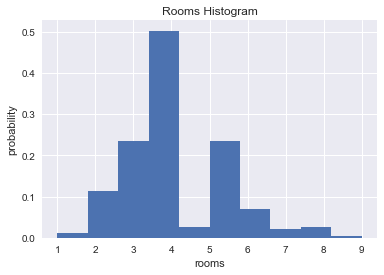

In [12]:
# create a histogram for 'rooms'
df.rooms.plot('hist', title="Rooms Histogram", density=True)
plt.xlabel('rooms')
plt.ylabel('probability')

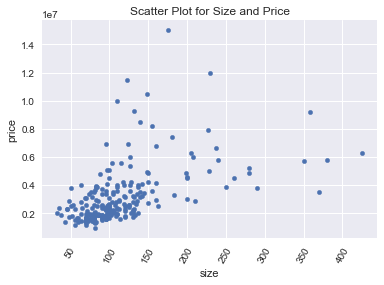

In [13]:
# create a scatter plot for size and price
df.plot(kind='scatter', x='size', y='price', rot=60, title="Scatter Plot for Size and Price")

Text(0,0.5,'probability')

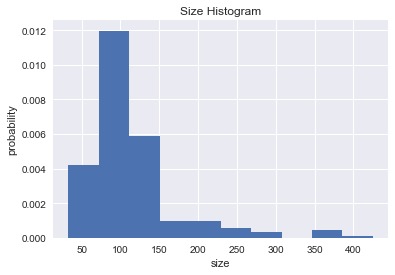

In [14]:
# create a histogram for 'size'
df['size'].plot('hist', title="Size Histogram", density=True)
plt.xlabel('size')
plt.ylabel('probability')

Text(0,0.5,'probability')

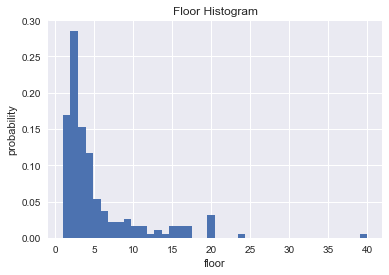

In [15]:
# create a histogram for 'floor'
df['floor'].plot('hist', title='Floor Histogram', density=True, bins=40)
plt.xlabel('floor')
plt.ylabel('probability')

Text(0,0.5,'probability')

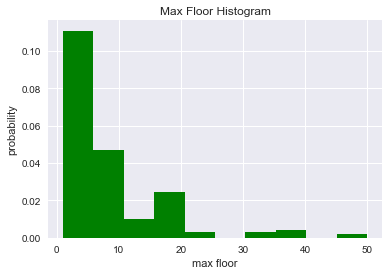

In [16]:
# create a histogram for 'max_floor'
df['max_floor'].plot('hist', title="Max Floor Histogram", color='green', density=True)
plt.xlabel('max floor')
plt.ylabel('probability')

Text(0,0.5,'probability')

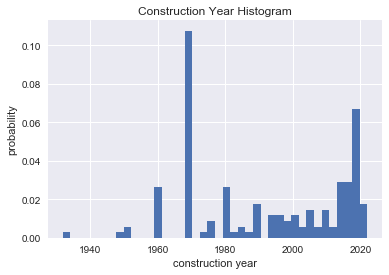

In [17]:
# create a histogram for 'construction_year'
df['construction_year'].plot('hist', title='Construction Year Histogram', density=True, bins=40)
plt.xlabel('construction year')
plt.ylabel('probability')

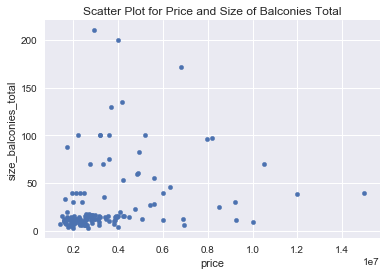

In [18]:
# create a scatter plot for 'price' and 'size_balconies_total'
df.plot(kind='scatter', x='price', y='size_balconies_total', title='Scatter Plot for Price and Size of Balconies Total')

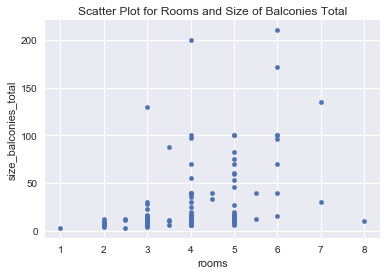

In [19]:
# create a scatter plot for 'size_balconies_total' and 'rooms'
df.plot(kind='scatter', x='rooms', y='size_balconies_total', title='Scatter Plot for Rooms and Size of Balconies Total')

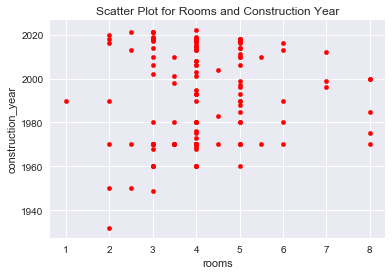

In [20]:
# create a scatter plot for 'construction_year' and 'rooms'
df.plot(kind='scatter', x='rooms', y='construction_year', title='Scatter Plot for Rooms and Construction Year', color='red')

Text(0,0.5,'probability')

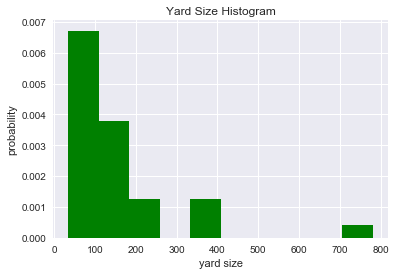

In [21]:
# create a histogram for 'yard_size'
df['yard_size'].plot('hist', title='Yard Size Histogram', density=True, color='green')
plt.xlabel('yard size')
plt.ylabel('probability')

Text(0,0.5,'probability')

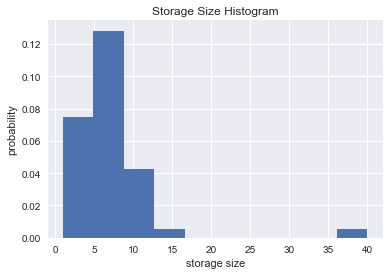

In [22]:
# create a histogram for 'storage_size'
df['storage_size'].plot('hist', title='Storage Size Histogram', density=True)
plt.xlabel('storage size')
plt.ylabel('probability')

In [23]:
# prints the count, mean, std, min, 25%, 50%, 75& and max for all numeric cols 
df.describe()

## possible OUTLIERS in max : no_balconies, size_balconies_total, construction_year, squared_meter_price
## MISSING DATA : squared_meter_price

,rooms,floor,max_floor,size,no_balconies,size_balconies_total,construction_year,yard_size,storage_size,no_elevators,no_parking,price,squared_meter_price,property_tax,maintenance_fee,Unnamed: 29
count,229.0,194.0,208.0,230.0,132.0,131.0,153.0,32.0,48.0,120.0,160.0,229.0,5.0,127.0,100.0,0.0
mean,4.1,4.9,8.6,114.6,1.2,29.1,"1,992.3",156.0,6.9,1.7,1.3,"3,184,506.6","27,106.0","1,057.7",464.7,nan
std,1.3,5.5,8.7,60.1,0.4,37.9,22.2,147.9,5.8,1.0,0.5,"2,025,408.7","18,159.1",810.8,653.8,nan
min,1.0,1.0,1.0,33.0,1.0,3.0,"1,932.0",35.0,1.0,1.0,1.0,"960,000.0",250.0,95.0,30.0,nan
25%,3.0,2.0,4.0,80.0,1.0,10.0,"1,970.0",75.0,4.0,1.0,1.0,"1,890,000.0","23,226.0",655.5,100.0,nan
50%,4.0,3.0,5.0,100.0,1.0,14.0,"1,993.0",105.0,6.0,1.0,1.0,"2,500,000.0","26,250.0",900.0,212.5,nan
75%,5.0,5.0,9.0,129.5,1.0,30.0,"2,016.0",168.5,8.0,2.0,2.0,"3,790,000.0","36,462.0","1,190.5",450.0,nan
max,9.0,40.0,50.0,425.0,3.0,210.0,"2,022.0",780.0,40.0,4.0,4.0,"15,000,000.0","49,342.0","5,770.0","4,000.0",nan


Text(0,0.5,'Number of Apartments')

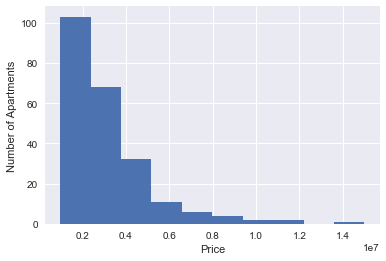

In [24]:
# create a histogram for 'price'
df['price'].plot('hist')
plt.xlabel('Price')
plt.ylabel('Number of Apartments')

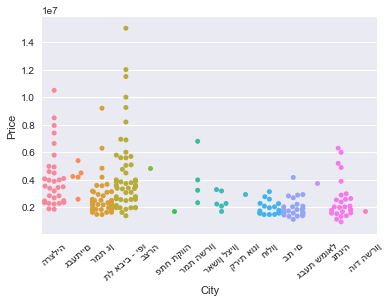

In [25]:
sns.swarmplot(x='city', y='price', data=df)
plt.xticks(rotation=40)
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

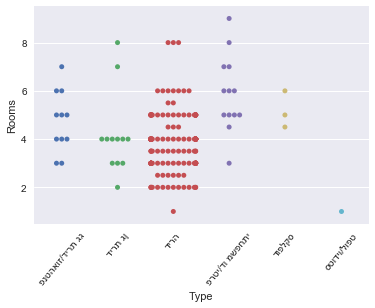

In [26]:
sns.swarmplot(x='type', y='rooms', data=df)
plt.xticks(rotation=50)
plt.xlabel('Type')
plt.ylabel('Rooms')
plt.show()

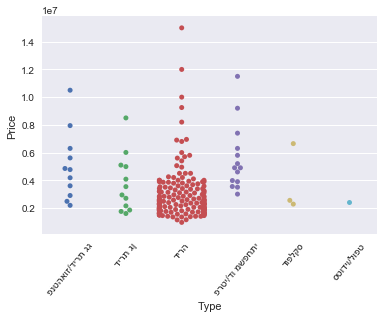

In [27]:
sns.swarmplot(x='type', y='price', data=df)
plt.xticks(rotation=50)
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

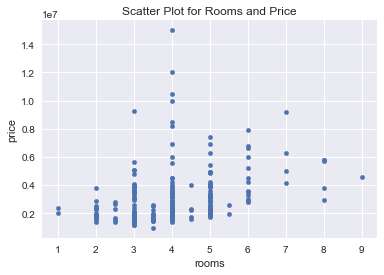

In [28]:
# create a scatter plot for 'construction_year' and 'rooms'
df.plot(kind='scatter', x='rooms', y='price', title='Scatter Plot for Rooms and Price')


In [29]:
# try to initialize a sqm_price 
df['sqm_price'] = df['price'] / df['size']

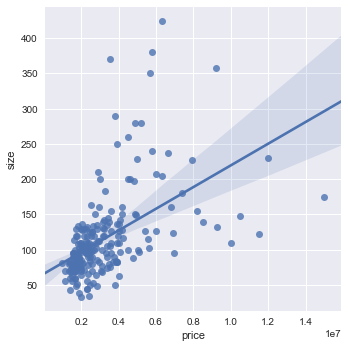

In [30]:
sns.lmplot(x='price', y='size', data=df, palette='Set1')

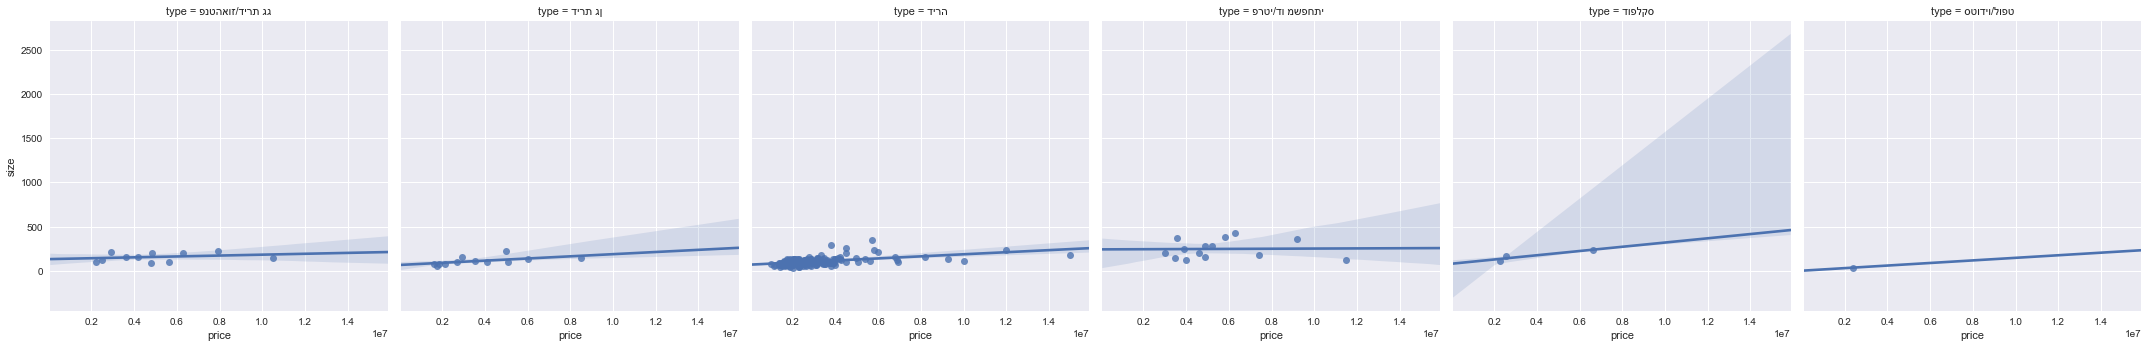

In [31]:
sns.lmplot(x='price', y='size', col='type', data=df, palette='Set1')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 1 to 494
Data columns (total 30 columns):
type                    230 non-null object
rooms                   229 non-null float64
floor                   194 non-null float64
max_floor               208 non-null float64
size                    230 non-null float64
no_balconies            132 non-null float64
size_balconies_total    131 non-null float64
construction_year       153 non-null float64
yard_size               32 non-null float64
storage_size            48 non-null float64
no_elevators            120 non-null float64
no_parking              160 non-null float64
price                   229 non-null float64
squared_meter_price     5 non-null float64
property_tax            127 non-null float64
maintenance_fee         100 non-null float64
condition               230 non-null object
photos_existence        230 non-null object
city                    230 non-null object
address                 230 non-null object
admi

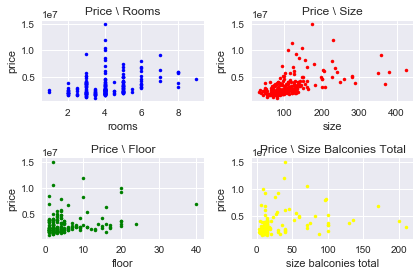

In [33]:
# Create a figure with 2x2 subplot layout and make the top left subplot active
plt.subplot(2,2,1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(df['rooms'], df['price'], marker='.', linestyle='none', color='blue')
plt.title('Price \ Rooms')
plt.xlabel('rooms')
plt.ylabel('price')

# Make the top right subplot active in the current 2x2 subplot grid 
plt.subplot(2,2,2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot( df['size'], df['price'], marker='.', linestyle='none', color='red')
plt.title('Price \ Size')
plt.xlabel('size')
plt.ylabel('price')

# Make the bottom left subplot active in the current 2x2 subplot grid
plt.subplot(2,2,3)

# Plot in green the % of degrees awarded to women in Health Professions
plt.plot( df['floor'], df['price'], marker='.', linestyle='none', color='green')
plt.title('Price \ Floor')
plt.xlabel('floor')
plt.ylabel('price')

# Make the bottom right subplot active in the current 2x2 subplot grid
plt.subplot(2,2,4)

# Plot in yellow the % of degrees awarded to women in Education
plt.plot(df['size_balconies_total'], df['price'], marker='.', linestyle='none', color='yellow')
plt.title('Price \ Size Balconies Total')
plt.xlabel('size balconies total')
plt.ylabel('price')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()



In [34]:
# value counts for 'type'
df.city.value_counts(dropna=False)

תל אביב - יפו    54
רמת גן           49
הרצליה           35
בת ים            28
נתניה            27
חולון            17
ראשון לציון       6
גבעתיים           5
רמת השרון         4
הוד השרון         1
בצרה              1
קרית אונו         1
פתח תקווה         1
גבעת שמואל        1
Name: city, dtype: int64

In [35]:
df.describe()

,rooms,floor,max_floor,size,no_balconies,size_balconies_total,construction_year,yard_size,storage_size,no_elevators,no_parking,price,squared_meter_price,property_tax,maintenance_fee,Unnamed: 29,sqm_price
count,229.0,194.0,208.0,230.0,132.0,131.0,153.0,32.0,48.0,120.0,160.0,229.0,5.0,127.0,100.0,0.0,229.0
mean,4.1,4.9,8.6,114.6,1.2,29.1,"1,992.3",156.0,6.9,1.7,1.3,"3,184,506.6","27,106.0","1,057.7",464.7,nan,"29,382.9"
std,1.3,5.5,8.7,60.1,0.4,37.9,22.2,147.9,5.8,1.0,0.5,"2,025,408.7","18,159.1",810.8,653.8,nan,"14,585.7"
min,1.0,1.0,1.0,33.0,1.0,3.0,"1,932.0",35.0,1.0,1.0,1.0,"960,000.0",250.0,95.0,30.0,nan,"9,594.6"
25%,3.0,2.0,4.0,80.0,1.0,10.0,"1,970.0",75.0,4.0,1.0,1.0,"1,890,000.0","23,226.0",655.5,100.0,nan,"20,000.0"
50%,4.0,3.0,5.0,100.0,1.0,14.0,"1,993.0",105.0,6.0,1.0,1.0,"2,500,000.0","26,250.0",900.0,212.5,nan,"24,494.9"
75%,5.0,5.0,9.0,129.5,1.0,30.0,"2,016.0",168.5,8.0,2.0,2.0,"3,790,000.0","36,462.0","1,190.5",450.0,nan,"33,714.3"
max,9.0,40.0,50.0,425.0,3.0,210.0,"2,022.0",780.0,40.0,4.0,4.0,"15,000,000.0","49,342.0","5,770.0","4,000.0",nan,"94,262.3"


In [36]:
df.condition.value_counts(dropna=False)

משופצת              72
חדשה מקבלן          67
שמורה               50
חדשה (עד 5 שנים)    30
דורשת שיפוץ         11
Name: condition, dtype: int64

Text(8.835,0.5,'price (in 10 million)')

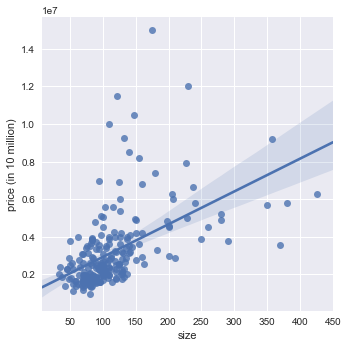

In [37]:
sns.lmplot(x='size', y='price', data=df)
plt.ylabel('price (in 10 million)')

In [38]:
# df = df.drop('seller_email', axis=1)

In [39]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [40]:
'''x_set, y_set = ecdf(df['size'])
_ = plt.plot(x = x_set, y = y_set, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.show()

print(x_set)'''

"x_set, y_set = ecdf(df['size'])\n_ = plt.plot(x = x_set, y = y_set, marker='.', linestyle='none')\n_ = plt.xlabel('x')\n_ = plt.ylabel('y')\nplt.show()\n\nprint(x_set)"

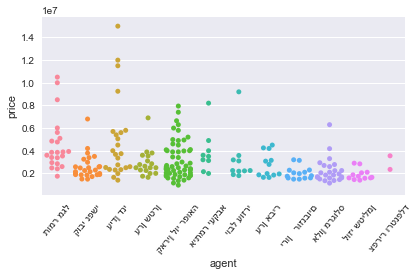

In [41]:
sns.swarmplot(x='agent', y='price', data=df)
plt.xlabel('agent')
plt.ylabel('price')
plt.xticks(rotation=50)
plt.tight_layout()

In [42]:
'''uniform_data = np.random.rand(10, 12)
print(uniform_data)
ax = sns.heatmap(uniform_data, linewidth=0.2)
plt.show()'''

'uniform_data = np.random.rand(10, 12)\nprint(uniform_data)\nax = sns.heatmap(uniform_data, linewidth=0.2)\nplt.show()'

In [47]:
# CHANGE TYPE TO NUMERIC

# value counts for 'type'
df['type'].value_counts(dropna=False).sort_values()

array = np.array(df.type)

# convert the types to integers
array[array == 'דירה'] = 0
array[array == 'פרטי/דו משפחתי'] = 1
array[array == 'דירת גן'] = 2
array[array == 'פנטהאוז/דירת גג'] = 3
array[array == 'דופלקס'] = 4
array[array == 'סטודיו/לופט'] = 5

df_num_type = pd.DataFrame({'num_type': array})

df.join(df_num_type)


,type,rooms,floor,max_floor,size,no_balconies,size_balconies_total,construction_year,yard_size,storage_size,...,agent,seller,seller_phone,seller_email,title,status,created,Unnamed: 29,sqm_price,num_type
id,,,,,,,,,,,,,,,,,,,,,
1,פנטהאוז/דירת גג,4.0,2.0,2.0,148.0,1.0,70.0,nan,nan,nan,...,תומר מגל,Germain Philippe,0544575269,enic@pedumaw-auch.com,וינגייט הרצליה,Published,07.02.2018,nan,"70,945.9",2
2,דירת גן,4.0,1.0,2.0,140.0,nan,25.0,nan,168.0,nan,...,תומר מגל,Germain Philippe,0544575269,enic@pedumaw-auch.com,וינגייט הרצליה- דירת גן,Published,07.02.2018,nan,"60,714.3",0
4,דירה,3.0,2.0,2.0,70.0,1.0,6.0,"1,960.0",nan,nan,...,תומר מגל,מרדכי בן ניסן,0528906167,bnissan.moti@gmail.com,דירת 3 חדרים במרכז גבעתיים,Published,07.02.2018,nan,"37,142.9",0
6,דירה,3.0,10.0,25.0,83.0,1.0,17.0,"2,014.0",nan,6.0,...,תומר מגל,שמעון ישראל,050-5296217,123@gmail.com,דירת 3 חדרים ברח ביאליק רמת-גן,Published,07.02.2018,nan,"35,542.2",0
7,דירה,2.0,2.0,2.0,75.0,1.0,nan,nan,nan,nan,...,קובי נפשי,אבי עובדיה,050-3228877,1234@gmail.com,דירת 2 חדרים ברמת גן,Published,07.02.2018,nan,"24,933.3",0
8,דירה,5.0,8.0,20.0,120.0,1.0,10.0,"2,014.0",nan,1.0,...,עידן דני,איציק עזריאל,054-7967101,itaz66@gmail.com,"דירת 5 חדרים, מרווחת עם חניה פרטית",Published,07.02.2018,nan,"21,000.0",0
9,דירה,4.0,17.0,19.0,85.0,1.0,nan,nan,nan,1.0,...,ערן שטרן,טובה רפפורט,052-3540806,rapoportat@gmail.com,דירת 3.5 חדרים ברמת גן,Published,07.02.2018,nan,"33,529.4",0
11,דירה,4.0,2.0,3.0,90.0,nan,nan,nan,nan,nan,...,עידן דני,פאול מיסן,050-000000,1234567@gmail.com,"דירת 4 חדרים,ברמת גן",Published,07.02.2018,nan,"26,111.1",3
12,דירה,4.0,20.0,23.0,110.0,1.0,9.0,"1,993.0",nan,nan,...,תומר מגל,דורון פלג,052-4320906,plgdoron@netvision.net.il,דירת 4 חדרים בלב תל אביב עם נוף פנורמי,Published,07.02.2018,nan,"90,909.1",0


In [48]:
'''
# Format the representation of floats
pd.options.display.float_format = '{:,.4f}'.format

def normalize(name):
    # Create x, where x the 'scores' column's values as floats
    x = df[[name]].values.astype(float)

    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)

    # Run the normalizer on the dataframe
    df_normalized = pd.DataFrame(x_scaled)
    df_normalized
 

# Get column names first
names = 'size'
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
   '''

"\n# Format the representation of floats\npd.options.display.float_format = '{:,.4f}'.format\n\ndef normalize(name):\n    # Create x, where x the 'scores' column's values as floats\n    x = df[[name]].values.astype(float)\n\n    # Create a minimum and maximum processor object\n    min_max_scaler = preprocessing.MinMaxScaler()\n\n    # Create an object to transform the data to fit minmax processor\n    x_scaled = min_max_scaler.fit_transform(x)\n\n    # Run the normalizer on the dataframe\n    df_normalized = pd.DataFrame(x_scaled)\n    df_normalized\n \n\n# Get column names first\nnames = 'size'\n# Create the Scaler object\nscaler = preprocessing.StandardScaler()\n# Fit your data on the scaler object\nscaled_df = scaler.fit_transform(df)\nscaled_df = pd.DataFrame(scaled_df, columns=names)\n   "